In [1]:
import pandas as pd
import numpy as np
import json
import ast

### try to scrape only barca's matches

In [4]:
def json_to_df(file):
    with open(file, 'r') as f:
        data = json.loads(f.read())
    data_dict = ast.literal_eval(str(data))
    
    new_df = pd.DataFrame()
    i=0
    while i < len(data_dict):
        new_df = new_df.append(pd.DataFrame.from_dict(data_dict[i], orient = 'index').T)
        i+=1
    new_df = new_df.set_index('index')
    return new_df

In [35]:
matches_base_url = 'https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/11/'
file_ext = [1,2,21,22,23,24,25,26,27,37,38,39,4,40,41,42]
matches = []

for f in file_ext:
    url = matches_base_url + str(f) + '.json'
    print(url)
    df = pd.read_json(url)
    for i in range(len(df)):
        match_id = df.loc[i,'match_id']
        match_date = df.loc[i,'match_date']
        competition_name = df.loc[i,'competition']['competition_name']
        season_name = df.loc[i,'season']['season_name']
        home_team_name = df.loc[i,'home_team']['home_team_name']
        away_team_name = df.loc[i,'away_team']['away_team_name']
        #print([match_id,match_date,competition_name,season_name,home_team_name,away_team_name])
        matches.append([match_id,match_date,competition_name,season_name,home_team_name,away_team_name])

matches_df = pd.DataFrame(matches, columns=['match_id','match_date','competition_name','season_name','home_team_name',
                                  'away_team_name'])

https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/11/1.json
https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/11/2.json
https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/11/21.json
https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/11/22.json
https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/11/23.json
https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/11/24.json
https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/11/25.json
https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/11/26.json
https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/11/27.json
https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/11/37.json
https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/11/38.json
https://raw.githubusercontent.com/statsbomb/open-data/master/data/m

In [227]:
barca_0910_mask = ((matches_df['home_team_name'] == 'Barcelona') | (matches_df['away_team_name'] == 'Barcelona')) & (matches_df['season_name'] == '2009/2010')
barca_1920_mask = ((matches_df['home_team_name'] == 'Barcelona') | (matches_df['away_team_name'] == 'Barcelona')) & (matches_df['season_name'] == '2019/2020')
matches_0910 = matches_df[barca_0910_mask]['match_id'].values
matches_1920 = matches_df[barca_1920_mask]['match_id'].values

In [228]:
url = 'https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/.json'
df_0910 = pd.DataFrame()
for i in matches_0910:
    try:
        df_0910 = pd.concat([pd.read_json(url[:-5]+str(i)+url[-5:]), df_0910])
    except:
        continue
df_1920 = pd.DataFrame()
for i in matches_1920:
    try:
        df_1920 = pd.concat([pd.read_json(url[:-5]+str(i)+url[-5:]), df_1920])
    except:
        continue

In [229]:
df_0910.to_csv('barca0910.csv', index=False)

In [230]:
df_1920.to_csv('barca1920.csv', index=False)

### Creating Network

In [290]:
df = pd.read_csv('barca1920.csv')
barca = df[df['possession_team'].str.contains('Barcelona')].copy(deep=True)
barca.shape

/Users/manandesai/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(85394, 39)

In [291]:
print(barca.columns)
barca.head()

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'duration',
       'tactics', 'related_events', 'player', 'position', 'location', 'pass',
       'carry', 'under_pressure', 'ball_receipt', 'duel', 'clearance',
       'off_camera', 'interception', 'foul_committed', 'dribble', 'foul_won',
       'counterpress', 'out', 'block', 'shot', 'goalkeeper', 'ball_recovery',
       '50_50', 'substitution', 'bad_behaviour', 'injury_stoppage',
       'miscontrol'],
      dtype='object')


,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,out,block,shot,goalkeeper,ball_recovery,50_50,substitution,bad_behaviour,injury_stoppage,miscontrol
0,d0fdc490-0cf2-48de-a516-7e3ea6498ec8,1,1,2021-03-01 00:00:00.000,0,0,"{'id': 35, 'name': 'Starting XI'}",1,"{'id': 217, 'name': 'Barcelona'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,745ef8bb-3a10-4a7c-ac36-1334e8df2d28,2,1,2021-03-01 00:00:00.000,0,0,"{'id': 35, 'name': 'Starting XI'}",1,"{'id': 217, 'name': 'Barcelona'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9a32d241-b9e9-456d-8009-e3c3e44eecf0,3,1,2021-03-01 00:00:00.000,0,0,"{'id': 18, 'name': 'Half Start'}",1,"{'id': 217, 'name': 'Barcelona'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8b5b2a66-7ef6-43bc-9dee-9bea1aba0ab4,4,1,2021-03-01 00:00:00.000,0,0,"{'id': 18, 'name': 'Half Start'}",1,"{'id': 217, 'name': 'Barcelona'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,a1f0c2db-0bfe-4a82-8d2a-fdae9e30bcc3,5,1,2021-03-01 00:00:01.398,0,1,"{'id': 30, 'name': 'Pass'}",2,"{'id': 217, 'name': 'Barcelona'}","{'id': 9, 'name': 'From Kick Off'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [292]:
bpass = barca[barca['pass'].notnull()].copy(deep=True)

In [293]:
bpass.head()

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,out,block,shot,goalkeeper,ball_recovery,50_50,substitution,bad_behaviour,injury_stoppage,miscontrol
4,a1f0c2db-0bfe-4a82-8d2a-fdae9e30bcc3,5,1,2021-03-01 00:00:01.398,0,1,"{'id': 30, 'name': 'Pass'}",2,"{'id': 217, 'name': 'Barcelona'}","{'id': 9, 'name': 'From Kick Off'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6900e90d-11fe-41b6-801f-36a4e090951f,8,1,2021-03-01 00:00:03.466,0,3,"{'id': 30, 'name': 'Pass'}",2,"{'id': 217, 'name': 'Barcelona'}","{'id': 9, 'name': 'From Kick Off'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,c276e44b-6f79-4393-865f-d16d1e754d23,11,1,2021-03-01 00:00:06.451,0,6,"{'id': 30, 'name': 'Pass'}",2,"{'id': 217, 'name': 'Barcelona'}","{'id': 9, 'name': 'From Kick Off'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,adf9fd51-0e73-4fa4-92b5-843ad30fc6a3,14,1,2021-03-01 00:00:08.236,0,8,"{'id': 30, 'name': 'Pass'}",2,"{'id': 217, 'name': 'Barcelona'}","{'id': 9, 'name': 'From Kick Off'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,7ef59340-3642-4b8e-8074-ab3130dfaa9b,18,1,2021-03-01 00:00:09.855,0,9,"{'id': 30, 'name': 'Pass'}",2,"{'id': 217, 'name': 'Barcelona'}","{'id': 9, 'name': 'From Kick Off'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [294]:
pass_dict = {}
for i in bpass.index.values:
    try:
        passer = ast.literal_eval(bpass.loc[i,'player'])['name']
        receiver = ast.literal_eval(bpass.loc[i,'pass'])['recipient']['name']
        ptup = pass_dict.get((passer,receiver),(0,0))
        pass_dict[(passer,receiver)] = (ptup[0] + 1, ptup[1])
        goal = ast.literal_eval(bpass.loc[i,'pass'])['goal_assist']
        if(goal):
            ptup = pass_dict.get((passer,receiver),(0,0))
            pass_dict[(passer,receiver)] = (ptup[0], ptup[1] + 1)
    except:
        continue

In [295]:
directed_df = pd.DataFrame(columns=['passer','receiver','passes','goals'])
undirected_df = pd.DataFrame(columns=['player1','player2','passes','goals'])
for ix,(k,v) in enumerate(pass_dict.items()):
    passer = k[0]
    receiver = k[1]
    passes = v[0]
    goals = v[1]
    directed_df.loc[ix] = [passer,receiver,passes,goals]
    undirected_df.loc[ix] = [min([passer,receiver]),max([passer,receiver]),passes,goals]
undirected_df = undirected_df.groupby(['player1','player2']).sum().reset_index()

In [296]:
pass_dict

{('Antoine Griezmann', 'Sergio Busquets i Burgos'): (71, 0),
 ('Sergio Busquets i Burgos', 'Héctor Junior Firpo Adames'): (45, 0),
 ('Héctor Junior Firpo Adames', 'Arturo Erasmo Vidal Pardo'): (22, 0),
 ('Arturo Erasmo Vidal Pardo', 'Arthur Henrique Ramos de Oliveira Melo'): (36,
  0),
 ('Arthur Henrique Ramos de Oliveira Melo', 'Clément Lenglet'): (45, 0),
 ('Clément Lenglet', 'Marc-André ter Stegen'): (182, 0),
 ('Marc-André ter Stegen', 'Gerard Piqué Bernabéu'): (207, 0),
 ('Gerard Piqué Bernabéu', 'Marc-André ter Stegen'): (268, 0),
 ('Marc-André ter Stegen', 'Clément Lenglet'): (181, 0),
 ('Gerard Piqué Bernabéu', 'Ivan Rakitić'): (117, 0),
 ('Ivan Rakitić', 'Sergio Busquets i Burgos'): (144, 0),
 ('Sergio Busquets i Burgos', 'Lionel Andrés Messi Cuccittini'): (373, 0),
 ('Clément Lenglet', 'Héctor Junior Firpo Adames'): (130, 0),
 ('Héctor Junior Firpo Adames', 'Clément Lenglet'): (127, 0),
 ('Clément Lenglet', 'Ivan Rakitić'): (109, 0),
 ('Ivan Rakitić', 'Gerard Piqué Bernabéu')

In [297]:
directed_df.to_csv('directed_pass_1920_df.csv')
undirected_df.to_csv('undirected_pass_1920_df.csv')

In [299]:
undirected_df.sort_values(by='goals', ascending=False)

,player1,player2,passes,goals
600,Lionel Andrés Messi Cuccittini,Luis Alberto Suárez Díaz,318,11
95,Antoine Griezmann,Lionel Andrés Messi Cuccittini,282,5
144,Arturo Erasmo Vidal Pardo,Lionel Andrés Messi Cuccittini,444,4
466,Ivan Rakitić,Lionel Andrés Messi Cuccittini,356,3
145,Arturo Erasmo Vidal Pardo,Luis Alberto Suárez Díaz,105,2
...,...,...,...,...
282,David Soria Solís,Nemanja Maksimović,2,0
283,David Soria Solís,Oghenekaro Etebo,2,0
284,Denis Suárez Fernández,Fyodor Smolov,3,0
285,Denis Suárez Fernández,Iago Aspas Juncal,2,0


### Network Analysis

In [2]:
import pandas as pd
import numpy as np
import networkx as nx

In [3]:
directed0910_df = pd.read_csv('directed_pass_0910_df.csv').drop('Unnamed: 0', axis=1)
undirected0910_df = pd.read_csv('directed_pass_0910_df.csv').drop('Unnamed: 0', axis=1)
directed1920_df = pd.read_csv('directed_pass_1920_df.csv').drop('Unnamed: 0', axis=1)
undirected1920_df = pd.read_csv('directed_pass_1920_df.csv').drop('Unnamed: 0', axis=1)

min_pass_limit = 20

d0910_df = directed0910_df[directed0910_df['passes'] >= min_pass_limit]
d0910_df.columns=['Source', 'Target', 'Passes', 'Goals']
u0910_df = undirected0910_df[undirected0910_df['passes'] >= min_pass_limit]
u0910_df.columns=['Source','Target', 'Passes', 'Goals']
d1920_df = directed1920_df[directed1920_df['passes'] >= min_pass_limit]
d1920_df.columns=['Source','Target', 'Passes', 'Goals']
u1920_df = undirected1920_df[undirected1920_df['passes'] >= min_pass_limit]
u1920_df.columns=['Source','Target', 'Passes', 'Goals']

In [4]:
d0910_df.to_csv('d0910.csv', index=False)
u0910_df.to_csv('u0910.csv', index=False)
d1920_df.to_csv('d1920.csv', index=False)
u1920_df.to_csv('u1920.csv', index=False)

### Predicting Goals Scored

In [89]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
directed0910_df = pd.read_csv('directed_pass_0910_df.csv').drop('Unnamed: 0', axis=1)
directed1920_df = pd.read_csv('directed_pass_1920_df.csv').drop('Unnamed: 0', axis=1)

In [56]:
def get_player_stats(dset):
    pstats = pd.DataFrame(columns=['player','goals','assists'])
    pstats['player'] = list(set(list(dset['passer'].unique()) + list(dset['receiver'].unique())))
    for i in range(len(pstats)):
        player_name = pstats.loc[i,'player']
        assists = dset[dset['passer'] == player_name]['goals'].sum()
        goals = dset[dset['receiver'] == player_name]['goals'].sum()
        pstats.loc[i,'goals'] = goals
        pstats.loc[i,'assists'] = assists
        pstats.loc[i,'goals_responsible'] = goals + assists
    return pstats

In [57]:
pstats_0910 = get_player_stats(directed0910_df)
pstats_1920 = get_player_stats(directed1920_df)

In [59]:
pstats_0910.sort_values(by='goals_responsible', ascending=False)

,player,goals,assists,goals_responsible
72,Lionel Andrés Messi Cuccittini,29,10,39.0
10,Xavier Hernández Creus,2,15,17.0
252,Zlatan Ibrahimović,9,7,16.0
227,Daniel Alves da Silva,2,9,11.0
114,Pedro Eliezer Rodríguez Ledesma,7,3,10.0
...,...,...,...,...
115,Pedro Manuel Munitis Álvarez,0,0,0.0
113,Míchel Macedo Rocha Machado,0,0,0.0
112,Luis Morán Sánchez,0,0,0.0
111,José Maria Gutiérrez Hernández,0,0,0.0


In [99]:
measures_to_keep = ['closnesscentrality','betweenesscentrality','pageranks','eigencentrality','indegree','outdegree']
nstats_0910 = pd.read_csv('0910_network.csv')[['Id'] + measures_to_keep]
nstats_1920 = pd.read_csv('1920_network.csv')[['Id'] + measures_to_keep]
nstats_0910['indegree'] = nstats_0910['indegree']/18
nstats_0910['outdegree'] = nstats_0910['outdegree']/18
nstats_1920['indegree'] = nstats_1920['indegree']/18
nstats_1920['outdegree'] = nstats_1920['outdegree']/18
nstats_0910.head()

,Id,closnesscentrality,betweenesscentrality,pageranks,eigencentrality,indegree,outdegree
0,Bojan Krkíc Pérez,0.612903,0.000434,0.022439,0.699487,0.611111,0.388889
1,Gnégnéri Yaya Touré,0.904762,0.026831,0.052388,0.965890,0.944444,0.944444
2,Jeffren Isaac Suárez Bermúdez,0.500000,0.000000,0.009363,0.127548,0.111111,0.055556
3,Carles Puyol i Saforcada,0.950000,0.086773,0.053412,0.807345,0.833333,1.000000
4,Dmytro Chygrynskiy,0.678571,0.003299,0.026533,0.587785,0.555556,0.555556


In [100]:
merged0910 = pstats_0910.merge(nstats_0910, how='inner', left_on='player', right_on='Id').drop('Id', axis=1)
merged1920 = pstats_1920.merge(nstats_1920, how='inner', left_on='player', right_on='Id').drop('Id', axis=1)
merged0910.head()

,player,goals,assists,goals_responsible,closnesscentrality,betweenesscentrality,pageranks,eigencentrality,indegree,outdegree
0,Xavier Hernández Creus,2,15,17.0,0.904762,0.031382,0.119287,1.000000,1.000000,0.944444
1,Rafael Márquez Álvarez,0,1,1.0,0.730769,0.004277,0.024547,0.598056,0.555556,0.666667
2,Carles Puyol i Saforcada,1,2,3.0,0.950000,0.086773,0.053412,0.807345,0.833333,1.000000
3,Thierry Henry,3,2,5.0,0.633333,0.001410,0.027725,0.505883,0.444444,0.444444
4,Seydou Kéita,5,1,6.0,0.904762,0.054737,0.058373,0.959636,0.944444,0.944444


In [107]:
X0910 = merged0910[measures_to_keep]
y0910 = merged0910['goals_responsible']
X1920 = merged1920[measures_to_keep]
y1920 = merged1920['goals_responsible']
reg = LinearRegression().fit(X0910,y0910)
reg.score(X0910,y0910)

0.5924611469142282

In [108]:
model = sm.OLS(y0910,X0910)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:      goals_responsible   R-squared (uncentered):                   0.746
Model:                            OLS   Adj. R-squared (uncentered):              0.637
Method:                 Least Squares   F-statistic:                              6.860
Date:                Mon, 08 Mar 2021   Prob (F-statistic):                     0.00148
Time:                        11:17:29   Log-Likelihood:                         -63.199
No. Observations:                  20   AIC:                                      138.4
Df Residuals:                      14   BIC:                                      144.4
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [110]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X0910,y0910)
print(regr.feature_importances_)
print(regr.score(X1920,y1920))

[0.06428559 0.04465251 0.66610063 0.1285387  0.05449879 0.04192379]
0.6244564426439512


### Cliques/Cores

In [4]:
import networkx as nx
from matplotlib import pyplot as plt

In [5]:
g = nx.Graph()  
g.add_edges_from(u0910_df[['Source', 'Target']].apply(tuple, axis=1))

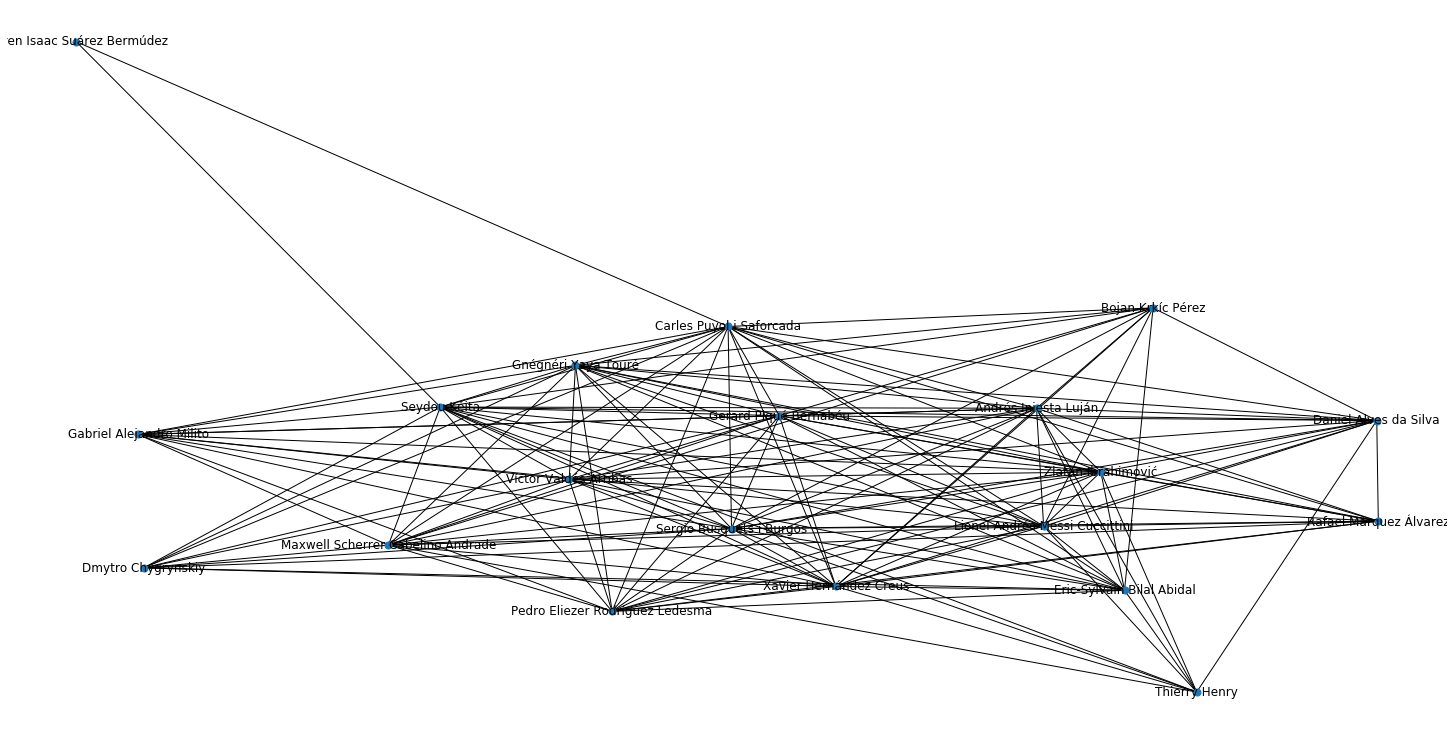

In [184]:
plt.figure(figsize = (20, 10))

nx.draw(g, with_labels = True, node_size = 50, font_size = 12)  
plt.show()

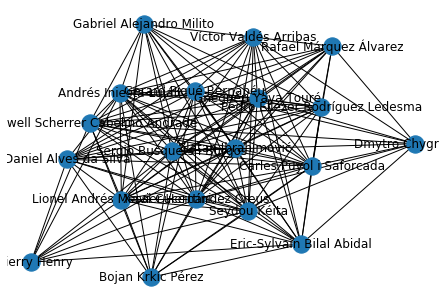

In [185]:
cliques = nx.find_cliques(g)
cliques4 = [clq for clq in cliques if len(clq) >= 5]
nodes = set(n for clq in cliques4 for n in clq)
h = g.subgraph(nodes)
deg = nx.degree(h)
nodes = [n for n in nodes if deg[n] >= 5]
k = h.subgraph(nodes)
nx.draw(k, with_labels=True)

### Network Level Statistics

In [5]:
g = nx.Graph()  
g.add_edges_from(u0910_df[['Source', 'Target']].apply(tuple, axis=1))
bw_0910 = pd.Series(nx.betweenness_centrality(g, normalized = False))

g = nx.Graph()  
g.add_edges_from(u1920_df[['Source', 'Target']].apply(tuple, axis=1))
bw_1920 = pd.Series(nx.betweenness_centrality(g, normalized = False))

In [6]:
max_bw = max(bw_0910)
sum_y_i = 0
for i in range(len(bw_0910)):
    y_i = max_bw - bw_0910[i]
    sum_y_i += y_i
n = len(bw_0910)
y_max = (((n-2)*(n-1))^2)/2
network_bw = sum_y_i/y_max
print(network_bw)

1.0346898199839376


In [7]:
max_bw = max(bw_1920)
sum_y_i = 0
for i in range(len(bw_1920)):
    y_i = max_bw - bw_1920[i]
    sum_y_i += y_i
n = len(bw_1920)
y_max = (((n-2)*(n-1))^2)/2
network_bw = sum_y_i/y_max
print(network_bw)

2.8172412249586163


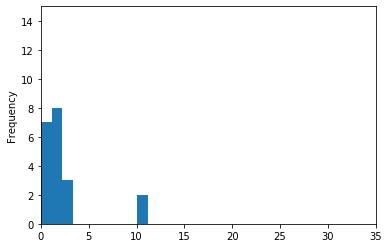

In [33]:
bw_0910.plot(kind='hist', ylim=(0,15), xlim=(0,35), bins=10)

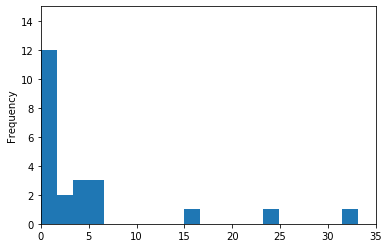

In [35]:
bw_1920.plot(kind='hist', ylim=(0,15), xlim=(0,35), bins=20)

In [14]:
g = nx.Graph()  
g.add_edges_from(u0910_df[['Source', 'Target']].apply(tuple, axis=1))
closeness_0910 = pd.Series(nx.closeness_centrality(g))

g = nx.Graph()  
g.add_edges_from(u1920_df[['Source', 'Target']].apply(tuple, axis=1))
closeness_1920 = pd.Series(nx.closeness_centrality(g))

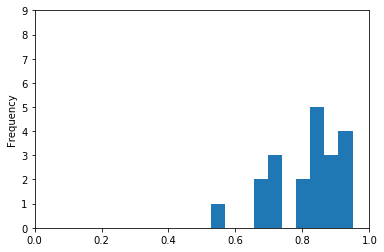

In [17]:
closeness_0910.plot(kind='hist', xlim=(0,1), ylim=(0,9))

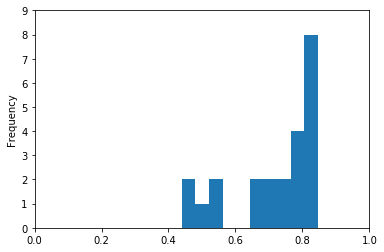

In [18]:
closeness_1920.plot(kind='hist', xlim=(0,1), ylim=(0,9))

In [19]:
max_cl = max(closeness_0910)
sum_y_i = 0
for i in range(len(closeness_0910)):
    y_i = max_cl - closeness_0910[i]
    sum_y_i += y_i
n = len(closeness_0910)
y_max = (((n-2)*(n-1))^2)/2
network_cl = sum_y_i/y_max
print(network_cl)

0.015706373942109015


In [20]:
max_cl = max(closeness_1920)
sum_y_i = 0
for i in range(len(closeness_1920)):
    y_i = max_cl - closeness_1920[i]
    sum_y_i += y_i
n = len(closeness_1920)
y_max = (((n-2)*(n-1))^2)/2
network_cl = sum_y_i/y_max
print(network_cl)

0.013021171501161086


In [21]:
g = nx.Graph()  
g.add_edges_from(u0910_df[['Source', 'Target']].apply(tuple, axis=1))
deg_0910 = pd.Series(nx.degree_centrality(g))

g = nx.Graph()  
g.add_edges_from(u1920_df[['Source', 'Target']].apply(tuple, axis=1))
deg_1920 = pd.Series(nx.degree_centrality(g))

In [22]:
max_deg = max(deg_0910)
sum_y_i = 0
for i in range(len(deg_0910)):
    y_i = max_deg - deg_0910[i]
    sum_y_i += y_i
n = len(deg_0910)
y_max = (((n-2)*(n-1))^2)/2
network_deg = sum_y_i/y_max
print(network_deg)

0.023529411764705882


In [23]:
max_deg = max(deg_1920)
sum_y_i = 0
for i in range(len(deg_1920)):
    y_i = max_deg - deg_1920[i]
    sum_y_i += y_i
n = len(deg_1920)
y_max = (((n-2)*(n-1))^2)/2
network_deg = sum_y_i/y_max
print(network_deg)

0.022924901185770754


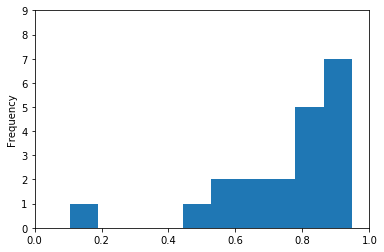

In [24]:
deg_0910.plot(kind='hist', xlim=(0,1), ylim=(0,9))

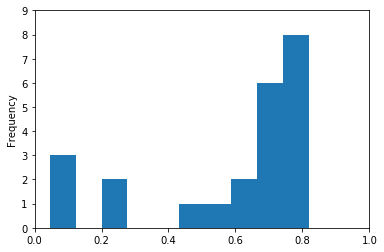

In [25]:
deg_1920.plot(kind='hist', xlim=(0,1), ylim=(0,9))